# US States Covid-19 Analysis

## Summary

We analyze the US states data for COVID-19 infection rates and observe that there is a negative correlation between number of clear days and infection rates.

## Analysis

Import modules and ingest the data.

In [1]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt; 
import warnings; warnings.filterwarnings("ignore")

In [2]:
def pd_sql(query): return sqldf(query, globals())

In [3]:
df1 = pd.read_csv("state-data.tsv", sep="\t")

In [4]:
df1.head()

,States,Cases,% Sun,Total Hours,Clear Days,Population,Avg °F
0,Alabama,0,58,2641,99,4903185,62.8
1,Alaska,0,41,2061,61,731545,26.6
2,Arizona,5,85,3806,193,7278717,60.3
3,Arkansas,0,61,2771,123,3017804,60.4
4,California,110,68,3055,146,39512223,59.4


Scale cases per state by population. Drop states with zero cases.

In [5]:
df2 = sqldf("SELECT (0.0 + Cases)/Population*1000000 as CaseDensity, * FROM df1 WHERE CaseDensity > 0.0"); df2.head()

,CaseDensity,States,Cases,% Sun,Total Hours,Clear Days,Population,Avg °F
0,0.686934,Arizona,5,85,3806,193,7278717,60.3
1,2.783949,California,110,68,3055,146,39512223,59.4
2,1.389194,Colorado,8,71,3204,136,5758736,45.1
3,1.402412,Connecticut,5,56,2585,82,3565287,49.0
4,0.279359,Florida,6,66,2927,101,21477737,70.7


Let's look at the correlations.

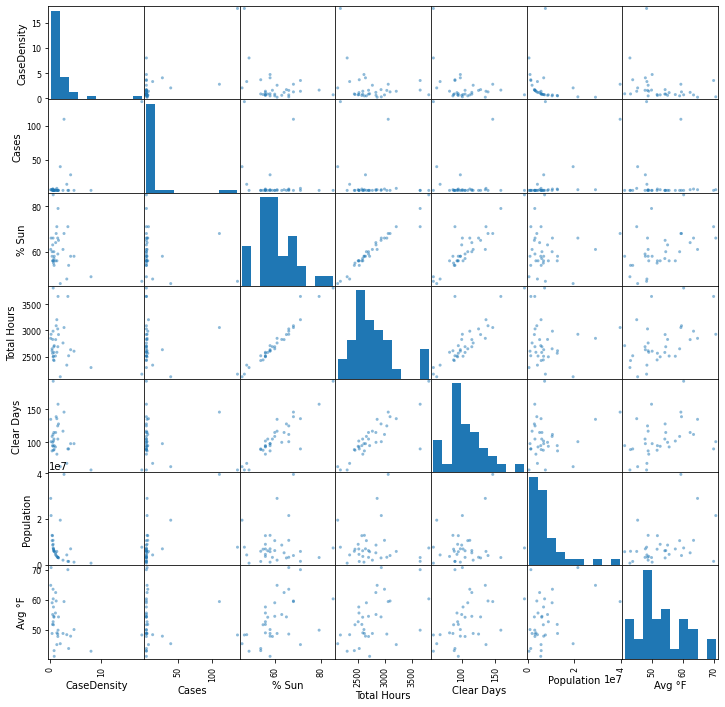

In [6]:
pd.plotting.scatter_matrix(df2, figsize=(12,12))
plt.show()

In [7]:
display(df2.corr())

,CaseDensity,Cases,% Sun,Total Hours,Clear Days,Population,Avg °F
CaseDensity,1.000000,0.707839,-0.368554,-0.307479,-0.420335,-0.147516,-0.266432
Cases,0.707839,1.000000,-0.201227,-0.197791,-0.144449,0.461537,-0.053017
% Sun,-0.368554,-0.201227,1.000000,0.973611,0.892822,0.053677,0.487677
Total Hours,-0.307479,-0.197791,0.973611,1.000000,0.815286,0.010445,0.489860
Clear Days,-0.420335,-0.144449,0.892822,0.815286,1.000000,0.180635,0.374306
Population,-0.147516,0.461537,0.053677,0.010445,0.180635,1.000000,0.378348
Avg °F,-0.266432,-0.053017,0.487677,0.489860,0.374306,0.378348,1.000000


Notice that the correlation between CaseDensity and Clear Days is -0.42. 

Let us now see the p-value of this correlation.

In [8]:
import scipy.stats as stats
stats.pearsonr(df2["CaseDensity"], df2["Clear Days"])

(-0.42033532554948233, 0.013318245638902295)

The p-value is low. This indicates that there is a statistically significant correlation between Clear Days and infection rates.

## Data Sources


Data | Source
---- | ------
COVID data | <https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-08-2020.csv>
Population by state | <https://www.census.gov/data/datasets/time-series/demo/popest/2010s-national-total.html>
Sunshine by state | <https://www.currentresults.com/Weather/US/average-annual-state-sunshine.php>
Temperature by state | <https://www.currentresults.com/Weather/US/average-annual-state-temperatures.php>